In [2]:
!pip install statsmodels
!pip install scikit-learn



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [4]:
# read the file
df=pd.read_csv('../Data/basic_dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              500 non-null    int64  
 1   Income_k$        500 non-null    int64  
 2   Education_Level  500 non-null    int64  
 3   Spending_Score   500 non-null    float64
 4   Purchased        500 non-null    int64  
 5   Customer_Type    500 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 23.6+ KB


In [6]:
df.head()

,Age,Income_k$,Education_Level,Spending_Score,Purchased,Customer_Type
0,56,56,1,77.218532,0,B
1,46,31,1,58.605438,1,B
2,32,74,1,69.175872,1,B
3,25,32,0,18.430414,0,C
4,38,42,1,49.654097,1,C


In [7]:
# check the null values
df.isnull().sum()

Age                0
Income_k$          0
Education_Level    0
Spending_Score     0
Purchased          0
Customer_Type      0
dtype: int64

# Perfomr EDA

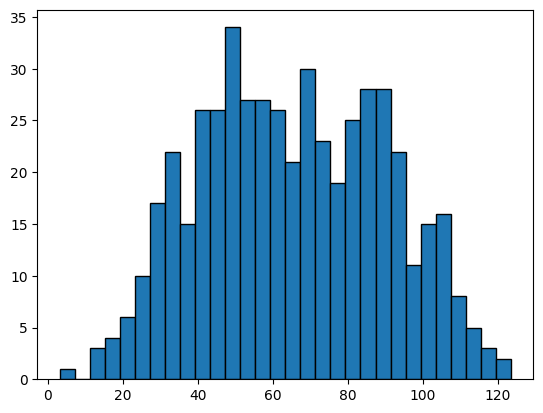

In [8]:
plt.hist(df['Spending_Score'],bins=30,edgecolor='k')
plt.show()

<Axes: xlabel='Age', ylabel='Spending_Score'>

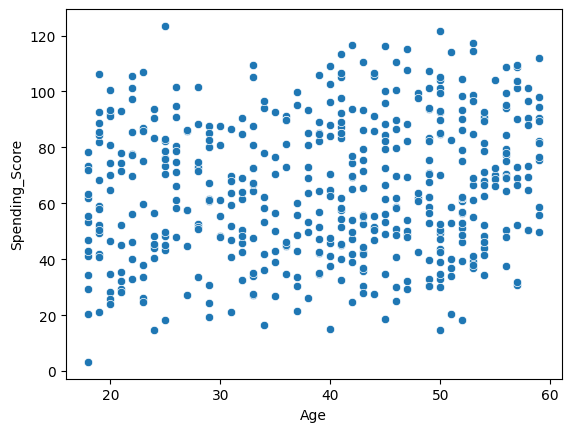

In [9]:
# age vs spending Score
sns.scatterplot(x="Age", y="Spending_Score", data=df)

<Axes: xlabel='Income_k$', ylabel='Spending_Score'>

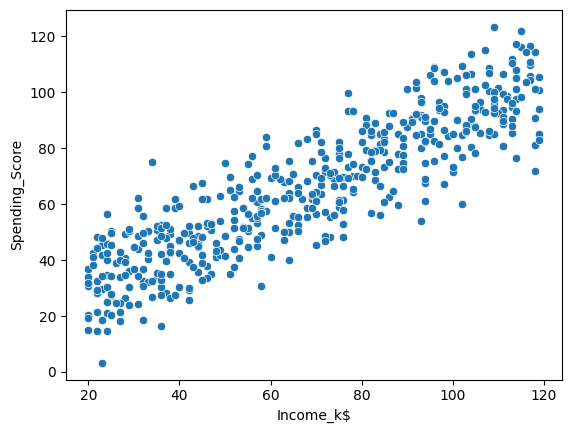

In [10]:
sns.scatterplot(x="Income_k$", y="Spending_Score", data=df)


<Axes: xlabel='Purchased', ylabel='Spending_Score'>

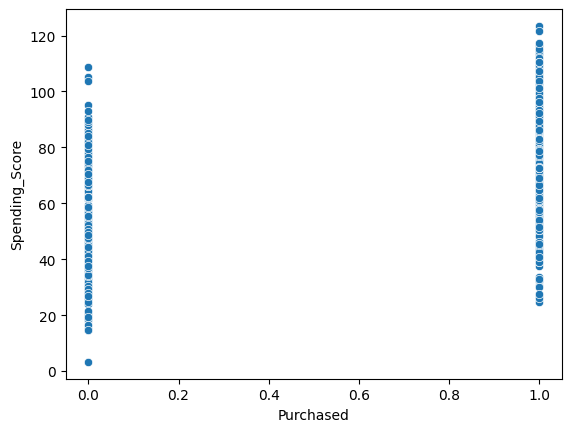

In [11]:
sns.scatterplot(x="Purchased",y="Spending_Score",data=df)

<Axes: xlabel='Education_Level', ylabel='Spending_Score'>

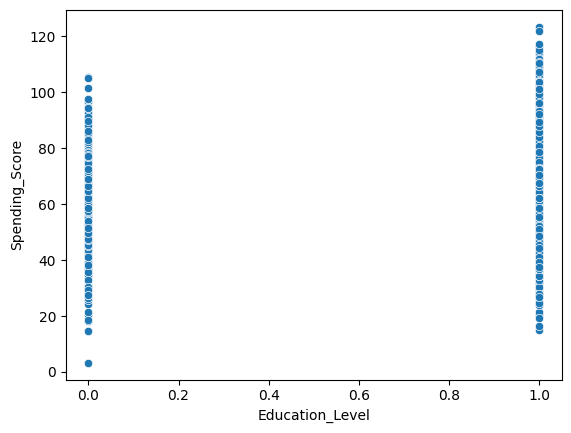

In [12]:
sns.scatterplot(x='Education_Level',y="Spending_Score",data=df)

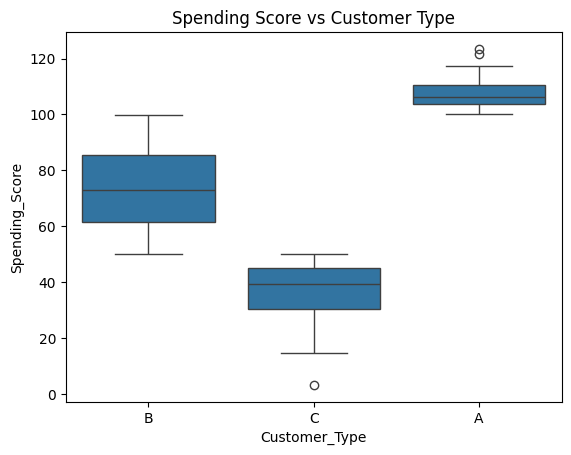

In [13]:
sns.boxplot(x='Customer_Type',y='Spending_Score',data=df)
plt.title("Spending Score vs Customer Type")
plt.show()

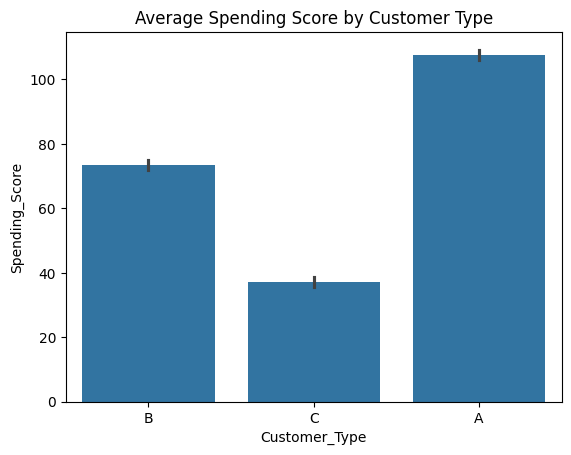

In [14]:
sns.barplot(x="Customer_Type", y="Spending_Score", data=df, estimator="mean")
plt.title("Average Spending Score by Customer Type")
plt.show()

<Axes: >

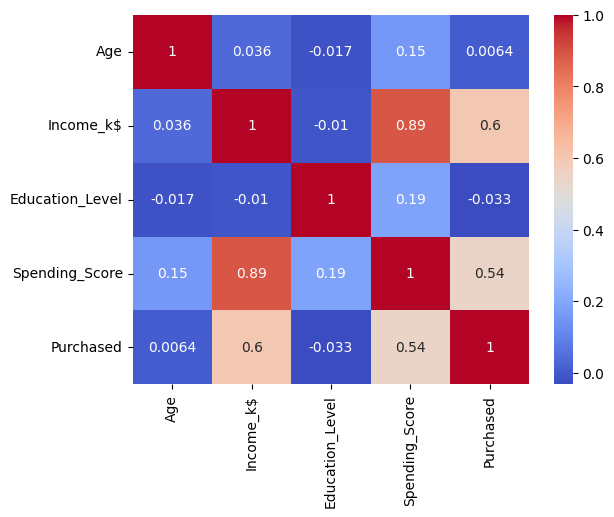

In [15]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [16]:
# create dummy for customer type
df_encoded = pd.get_dummies(df, columns=["Customer_Type"],dtype=int, drop_first=True)


In [17]:
df_encoded.head()

,Age,Income_k$,Education_Level,Spending_Score,Purchased,Customer_Type_B,Customer_Type_C
0,56,56,1,77.218532,0,1,0
1,46,31,1,58.605438,1,1,0
2,32,74,1,69.175872,1,1,0
3,25,32,0,18.430414,0,0,1
4,38,42,1,49.654097,1,0,1


#### Model Building

In [18]:
df_encoded.shape

(500, 7)

In [19]:
np.random.seed(0)
df_test,df_train=train_test_split(df_encoded,test_size=0.3,random_state=100)

In [20]:
df_test.shape

(350, 7)

In [21]:
df_train.shape


(150, 7)

In [22]:
# create test X and Y
y_train=df_train.pop("Spending_Score")
X_train=df_train

## Build Model lr_1

In [23]:

X_train_1 = sm.add_constant(X_train[['Income_k$']])

In [24]:
lr_1=sm.OLS(y_train,X_train_1).fit()

In [25]:
lr_1.params

const        15.253545
Income_k$     0.742390
dtype: float64

In [26]:
print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     649.0
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           5.67e-56
Time:                        15:22:26   Log-Likelihood:                -573.66
No. Observations:                 150   AIC:                             1151.
Df Residuals:                     148   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2535      2.193      6.957      0.0

#### Prediction on training Data

In [27]:
y_train_1_pred=lr_1.predict(sm.add_constant(X_train[['Income_k$']]))


#### Metrics Of Training Data

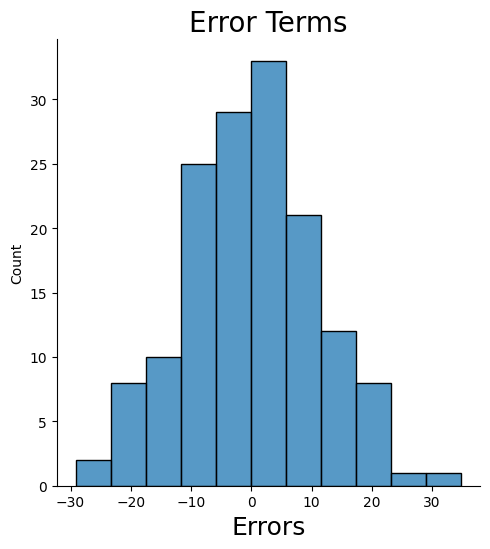

In [28]:
# error distribution
res=y_train-y_train_1_pred
sns.displot(res)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()

In [29]:
# mean of y_train data
train_1_mean=np.mean(y_train)
print(f"Mean value of train data: {train_mean}")

NameError: name 'train_mean' is not defined

In [ ]:
# mean squared error of train data
train_1_mse = mean_squared_error(y_train, y_train_pred)
print('mean squared error of train data:' ,train_1_mean)


mean squared error of train data: 66.05775168074264


In [ ]:
# root mean squared error of train data
train_1_rmse = np.sqrt(train_1_mse)
print("rmse Score of train data:",train_1_rmse)

rmse Score of train data: 7.812924277095172


In [ ]:
print(f"on average, model lr_1 predictions are off by ~{train_1_rmse:.1f} spending")

on average, model lr_1 predictions are off by ~7.8 spending


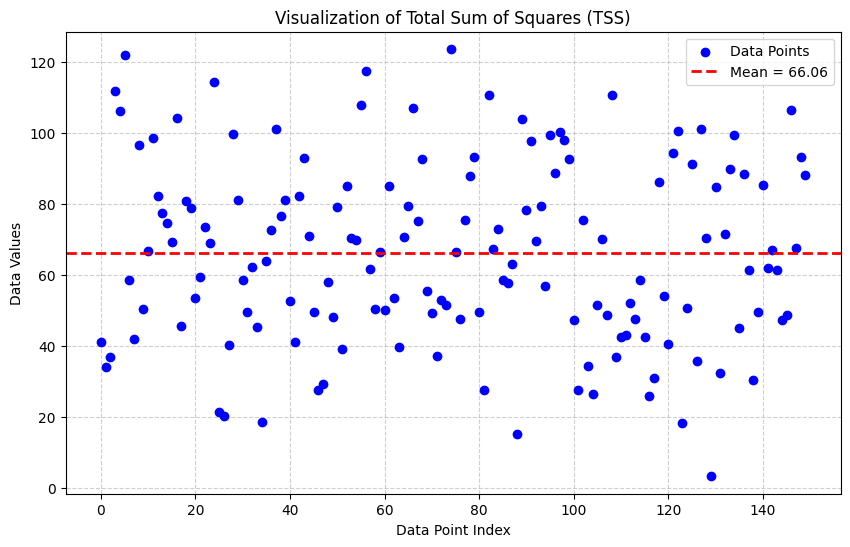

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the individual data points as a scatter plot
ax.scatter(range(len(y_train)), y_train, color='blue', label='Data Points', zorder=2)

# Plot a horizontal line at the mean value
ax.axhline(y=train_1_mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {train_1_mean:.2f}')

# Add labels and a title
ax.set_xlabel('Data Point Index')
ax.set_ylabel('Data Values')
ax.set_title('Visualization of Total Sum of Squares (TSS)')

# Set y-axis limits to provide better context
ax.set_ylim(min(y_train) - 5, max(y_train) + 5)

# Add a legend and grid
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

##### Above plot shows that the data is widely spread from average data point

#### Total Sum of Squares (TSS) / Total Variation  

**Definition:**  
TSS measures how much individual data points (e.g., spendings) vary from their average (mean).  
It shows the overall variability in the data.  

---

#### How it works:  

- We calculate the difference between each data point and the **average value**.  
- Square these differences.  
- Add them all together.  
- The result is the **TSS**.  

---

#### Interpretation  

- **Large Differences = Large TSS**  
  - If the individual spending amounts are very different from the average spending,  
    the TSS will be a **large number**.  
  - This indicates **high variability** (big spread in the data).  

- **Small Differences = Small TSS**  
  - If all the spending amounts are very close to the average,  
    the TSS will be a **small number**.  
  - This indicates **low variability** (data points are very similar).  

---

#### Intuition  

- **High TSS** → People’s spendings vary a lot.  
- **Low TSS** → Everyone spends about the same amount.  


In [ ]:
# total sum of sqaure or total variation
train_1_TSS = np.sum((y_train - train_mean)**2)
print("total variation of train data:", train_1_TSS)

total variation of train data: 99219.30403575004


#### Residual Sum of Squares (RSS)  

**Definition:**  
RSS measures the amount of variation in the data that the model **fails to explain**.  
It is the sum of squared differences between the **actual values** and the **predicted values** from the model.  

---

#### Formula  

$$
RSS = \sum (y_i - \hat{y}_i)^2
$$

Where:  
- \(y_i\) = actual value  
- $\hat{y}_i$ = predicted value by the model  

---

#### Interpretation  

- **Small RSS** → Predictions are very close to actual values → model fits well.  
- **Large RSS** → Predictions are far from actual values → model fits poorly.  

---

#### Intuition  

- **Low RSS** → The model captures most of the data’s variation.  
- **High RSS** → The model misses a lot of variation (poor fit).  


In [ ]:
# RSS residual sum of sqaure
train_1_RSS=np.sum((y_train-y_train_1_pred)**2)
print(f"RSS value of train data: {train_1_RSS}")

RSS value of train data: 18425.751769200993


In [ ]:
# R2 score of train data
print("R2 score of train data:",r2_score(y_train, y_train_1_pred))

R2 score of train data: 0.8142926726984303


#### Conclusion on Training Data (Using only the feature **Income_k$**)

##### RMSE Interpretation

- The **Root Mean Squared Error (RMSE)** on the training data is **11.0**.  

**Meaning:**  
- On average, model lr_1 predictions on training data differ from the actual values by about **11.0 points**.  
- Example:  
  - If the model lr_1 predicts a **Spending Score = 78** on training data,  
  - The actual score is likely to fall within the range:  

    **78 ± 11.0 → [66.0 , 89.0]**

##### Key Insight 
- A **smaller RMSE** indicates a more accurate model.  

##### R² Interpretation  

- **TSS (Total Sum of Squares / total variation):** `99,219.3040`  
- **RSS (Residual Sum of Squares / unexplained variation):** `18,425.7518`  
- **Explained variation (TSS - RSS):** `80,793.5523`  

$$
R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{18,425.7518}{99,219.3040} \approx 0.81
$$


✅ The model lr_1 explains about **81% of the total variation** in the training data.  
❌ About **19% of the variation** is not explained by the model lr_1.  



In [ ]:
# create test Data
y_test=df_test.pop('Spending_Score')
X_test=df_test

In [ ]:
y_test_1_pred=lr_1.predict(sm.add_constant(X_test[['Income_k$']]))

#### Metrics of Test Data

In [ ]:
# mean of y_test data
test_1_mean=np.mean(y_test)
print(f"Mean value of test data: {test_1_mean}")

Mean value of test data: 65.2052497156348


In [ ]:
# mean sqaured error of test data
test_1_mse = mean_squared_error(y_test, y_test_1_pred)
print('mean squared error of test data:' ,test_1_mse)

mean squared error of test data: 124.58696696094907


In [ ]:
test_1_rmse = np.sqrt(test_1_mse)
print("RMSE score of test data:",test_1_rmse)

RMSE score of test data: 11.161853204595959


In [ ]:
test_1_TSS = np.sum((y_test - test_1_mean)**2)
print("TSS value of test data:", test_1_TSS)

TSS value of test data: 198589.76506759826


In [ ]:
# RSS residual sum of sqaure
test_1_RSS=np.sum((y_test-y_test_1_pred)**2)
print(f"RSS value of test data: {test_1_RSS}")

RSS value of test data: 43605.43843633217


In [ ]:
# R2 score of Test data
train_1_r2=r2_score(y_test, y_test_1_pred)
print("R2 score of test data:",train_1_r2)

R2 score of test data: 0.7804245429189705


In [ ]:
print(f"model lr_1 was able to explain {train_1_r2*100:.1f}% variation on the test data")

model lr_1 was able to explain 78.0% variation on the test data


#### Conclusion on Test Data (Using only the feature **Income_k$**)

##### RMSE Interpretation

- The **Root Mean Squared Error (RMSE)** on the test data is **11.1**.  

**Meaning:**  
- On average, model lr_1 predictions on test data differ from the actual values by about **11.1 points**.  
- Example:  
  - If the model lr_1 predicts a **Spending Score = 78** on test data,  
  - The actual score is likely to fall within the range:  

    **78 ± 11.1 → [66.9 , 89.1]**

##### Key Insight 
- A **smaller RMSE** indicates a more accurate model.  

##### R² Interpretation  

- **TSS (Total Sum of Squares / total variation):** `198589.76506759826`  
- **RSS (Residual Sum of Squares / unexplained variation):** `43605.43843633217`  
- **Explained variation (TSS - RSS):** `154984.3266312661`  

$$
R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{43605.43843633217}{198589.76506759826} \approx 0.78
$$


✅ The model lr_1 explains about **78% of the total variation** in the test data.  
❌ About **22% of the variation** is not explained by the model. 


## Build Model lr_2

In [ ]:
X_train

,Age,Income_k$,Education_Level,Purchased,Customer_Type_B,Customer_Type_C
69,40,48,0,1,0,1
29,33,35,0,0,0,1
471,43,30,1,0,0,1
344,59,113,1,1,0,0
54,19,95,1,1,0,0
...,...,...,...,...,...,...
308,46,44,1,0,0,1
171,41,111,1,1,0,0
457,29,45,1,1,1,0
75,43,105,0,1,1,0


#### Perform Variance inflation factor to determine the multicollinearity 

In [ ]:
vif = pd.DataFrame()
X = X_train.drop(columns=['Age','Purchased'])
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Income_k$,4.01
2,Customer_Type_B,3.02
1,Education_Level,2.32
3,Customer_Type_C,1.32


In [ ]:
X_train_2 = sm.add_constant(X_train[vif["Features"]])

In [ ]:
lr_2=sm.OLS(y_train,X_train_2).fit()

In [ ]:
lr_2.params

const              46.440783
Income_k$           0.507932
Customer_Type_B   -16.387759
Education_Level     6.114463
Customer_Type_C   -30.309777
dtype: float64

In [ ]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     313.6
Date:                Sat, 23 Aug 2025   Prob (F-statistic):           2.75e-70
Time:                        11:17:33   Log-Likelihood:                -529.90
No. Observations:                 150   AIC:                             1070.
Df Residuals:                     145   BIC:                             1085.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              46.4408      4.980     

#### Prediction on Train Data

In [ ]:
y_train_2_pred=lr_2.predict(X_train_2)

#### Error Distribution of Train Data

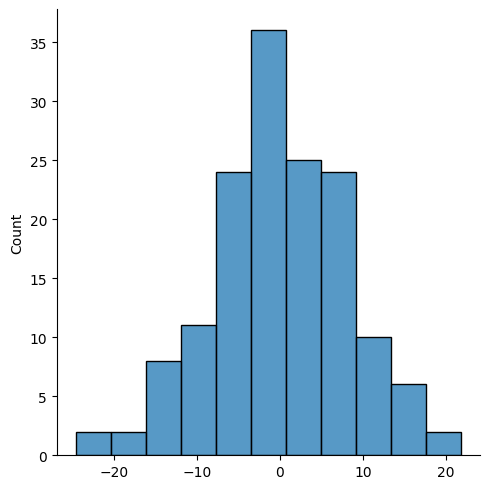

In [ ]:
res=y_train-y_train_2_pred
sns.displot(res)
plt.show()

#### Train Data Metric

In [ ]:
# mena of y_train data
train_2_mean=np.mean(y_train)
print(f"mean value of train data: {train_2_mean}")

mean value of train data: 66.05775168074264


In [ ]:
# mean squared error of train data
train_2_mse=mean_squared_error(y_train,y_train_2_pred)
print(f"mean sqaured error of train data: {train_2_mse}")

mean sqaured error of train data: 68.54031465760657


In [ ]:
# root mean squarede error of train data
train_2_rmse=np.sqrt(train_2_mse)
print(f"root mean squared of train data: {train_2_rmse}")

root mean squared of train data: 8.278907817919377


In [ ]:
print(f"on average, model lr_2 predictions are off by ~{train_2_rmse:.1f} spending on train data")

on average, model lr_2 predictions are off by ~8.3 spending on train data


In [ ]:
# total sum of square or total variation of train data
train_2_TSS=np.sum((y_train-train_2_mean)**2)
print(f"total sum of sqaure or total variation on train data: {train_2_TSS}")

total sum of sqaure or total variation on train data: 99219.30403575004


In [ ]:
# residual sum of square train data
train_2_rss=np.sum((y_train-y_train_2_pred)**2)
print(f"residula sum of square on train data: {train_2_rss}")

residula sum of square on train data: 10281.047198640987


In [ ]:
# r2 score of train data
train_2_r2=r2_score(y_train,y_train_2_pred)
print(f"r2 score of train data: {train_2_r2}")

r2 score of train data: 0.8963805753471463


In [ ]:
print(f"model lr_2 was able to explain {train_2_r2*100:.1f}% variation on the train data")

model lr_2 was able to explain 89.6% variation on the train data


#### Conclusion on Train Data using features [Income_k$,Customer_Type_B,Education_Level,Customer_Type_C]

##### RMSE Interpretation

- The **Root Mean Squared Error (RMSE)** on the training data is **8.2**.  

**Meaning:**  
- On average, model lr_2 predictions on training data differ from the actual values by about **8.2 points**.  
- Example:  
  - If the model lr_2 predicts a **Spending Score = 78** on training data,  
  - The actual score is likely to fall within the range:  

    **78 ± 8.2 → [86.2 , 69.8]**

##### Key Insight 
- A **smaller RMSE** indicates a more accurate model.  

##### R² Interpretation  

- **TSS (Total Sum of Squares / total variation):** `99219.30403575004`  
- **RSS (Residual Sum of Squares / unexplained variation):** `10281.047198640987`  
- **Explained variation (TSS - RSS):** `88938.25683710906`  

$$
R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{10281.047198640987}{99219.30403575004} \approx 0.89
$$


✅ The model lr_2 explains about **89% of the total variation** in the on training data.  
❌ About **11% of the variation** is not explained by the model. 

#### Prediction on Test Data

In [ ]:
X_test_2 = sm.add_constant(X_test[vif["Features"]])

In [ ]:
y_test_2_pred=lr_2.predict(X_test_2)

In [ ]:
# mean of y_test data
test_2_mean=np.mean(y_test)
print(f"mean value of test data: {test_2_mean}")

mean value of test data: 65.2052497156348


In [ ]:
# mean squared error on test data
test_2_mse=mean_squared_error(y_test,y_test_2_pred)
print(f"mean sqaured error of test data: {test_2_mse}")

mean sqaured error of test data: 66.18728965858419


In [ ]:
# root mean squared error on test data
test_2_rmse=np.sqrt(test_2_mse)
print(f"root mean squared error of test data: {test_2_rmse}")

root mean squared error of test data: 8.135557120356552


In [ ]:
print(f"on average, model lr_2 predictions are off by ~{test_2_rmse:.1f} spending on train data")

on average, model lr_2 predictions are off by ~8.1 spending on train data


In [ ]:
# total sum of square or total variation of train data
test_2_TSS=np.sum((y_test-test_2_mean)**2)
print(f"total sum of sqaure or total variation on test data: {test_2_TSS}")

total sum of sqaure or total variation on test data: 198589.76506759826


In [ ]:
# residual sum of square test data
test_2_rss=np.sum((y_test-y_test_2_pred)**2)
print(f"residula sum of square on test data: {test_2_rss}")

residula sum of square on test data: 23165.551380504465


In [ ]:
# r2 score of test data
test_2_r2=r2_score(y_test,y_test_2_pred)
print(f"r2 score of test data: {test_2_r2}")

r2 score of test data: 0.8833497216101791


In [ ]:
print(f"model lr_2 was able to explain {test_2_r2*100:.1f}% variation on the test data")

model lr_2 was able to explain 88.3% variation on the test data


#### Conclusion on Test Data using features [Income_k$,Customer_Type_B,Education_Level,Customer_Type_C]

##### RMSE Interpretation

- The **Root Mean Squared Error (RMSE)** on the test data is **8.1**.  

**Meaning:**  
- On average, model lr_2 predictions on test data differ from the actual values by about **8.1 points**.  
- Example:  
  - If the model lr_2 predicts a **Spending Score = 78** on test data,  
  - The actual score is likely to fall within the range:  

    **78 ± 8.1 → [86.1 , 69.7]**

##### Key Insight 
- A **smaller RMSE** indicates a more accurate model.  

##### R² Interpretation  

- **TSS (Total Sum of Squares / total variation):** `198589.76506759826`  
- **RSS (Residual Sum of Squares / unexplained variation):** `23165.551380504465`  
- **Explained variation (TSS - RSS):** `175424.21368709378`  

$$
R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{23165.551380504465}{198589.76506759826} \approx 0.88
$$


✅ The model lr_2 explains about **82% of the total variation** in the on test data.  
❌ About **12% of the variation** is not explained by the model. 

## Build Model lr_3

In [ ]:
X_test_3=sm.add_constant(X_test)

In [ ]:
lr_3=sm.OLS(y_test,X_test_3).fit()

In [ ]:
lr_3.params

const              41.133311
Age                 0.132964
Income_k$           0.505889
Education_Level     6.560480
Purchased           0.223623
Customer_Type_B   -16.437476
Customer_Type_C   -31.093678
dtype: float64

In [ ]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     455.5
Date:                Sat, 23 Aug 2025   Prob (F-statistic):          4.85e-160
Time:                        11:17:33   Log-Likelihood:                -1222.4
No. Observations:                 350   AIC:                             2459.
Df Residuals:                     343   BIC:                             2486.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              41.1333      3.853     

#### Prediction on Train data

In [ ]:
y_test_3_pred=lr_3.predict(X_test_3)

#### Error distribution of test data using model lr_3

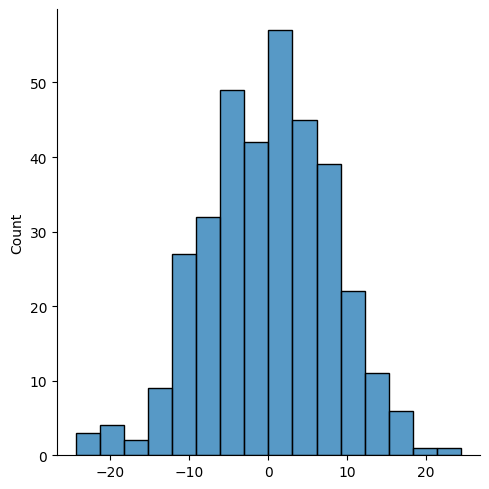

In [ ]:
res=y_test-y_test_3_pred
sns.displot(res)
plt.show()

#### Test 